# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pickle
import sys, os, pprint
from classes.camera   import Camera
from classes.line     import Line 
from classes.plotting import PlotDisplay

from classes.image  import CalibrationImage
from common.utils   import *
from common.sobel   import *

pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
# pp.pprint(sys.path)
# if '..' not in sys.path:
#     print("appending '..' to sys.path")
#     sys.path.append('..')

Current working dir:  E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines


# Camera Calibration

In [ ]:
imageNames = glob.glob('./camera_cal/calibration*.jpg')
imageCount = len(imageNames)
imageIndexes = range(imageCount)

##  Compute the camera calibration using `Camera` Class

### Read chessboard images and detect corners

In [ ]:
try: 
    del camera
except: 
    print(' object doesnt exist')
    pass

camera = Camera(width = 1280, height = 720)
calImages = []

In [ ]:
nx = 9; ny = 6

# for idx in imageIndexes:
for idx in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]:  
#     if idx  == 0:
#         nx = 9; ny = 5  ## (9,4), (9,5)
#     elif idx == 14:
# #       nx = 6; ny = 5  ## (6,3)  (6,4) (6,5) (7,4)
#         nx = 7; ny = 4  ## (6,3)  (6,4) (6,5) (7,4)
#     elif idx == 15:
#         nx = 7; ny = 6  ## (7,5) (7,6)
#     else: 
#         nx = 9; ny = 6

    image = CalibrationImage(imageNames[idx])
    ret = image.findChessboardCorners(nx,ny, save = True, debug = True)

    if ret: 
        print('\n Idx : ', idx ,' File name: ', image.filename,'nx: ', image.nx, 'ny: ', image.ny, ' findCorners result: ' , image.PtrnFnd, ' ret :', ret)
        calImages.append(image)
    else: 
        print('\n Idx : ', idx ,' File name: ', image.filename, '  - Corner Detection Failed')

### Detect chessboard corners for one image without saving 

In [ ]:
# for idx in [0,14,15,16]:  
for idx in [11]:  
    if idx  == 0:
        nx = 9; ny = 5  ## (9,4), (9,5)
    elif idx == 11:
        nx = 8; ny = 6
    elif idx == 14:
#         nx = 6; ny = 5  ## (6,3)  (6,4) (6,5) (7,4)
#         nx = 7; ny = 4  ## (6,3)  (6,4) (6,5) (7,4)\
         nx = 7; ny = 4 
    elif idx == 15:
        nx = 7; ny = 6  ## (7,5) (7,6)
    else: 
        nx = 9; ny = 6

    imgObj    = CalibrationImage(imageNames[idx])
    inputImg  = imgObj.getImage()
    undistImg = camera.undistortImage(inputImg)
    
    print(imgObj.filename, nx,ny)    
    ret = image.findChessboardCorners(img = undistImg, nx = nx, ny = ny, save = False, debug = True)

    if ret: 
        print('\n Idx : ', idx ,' File name: ', image.filename,'nx: ', image.nx, 'ny: ', image.ny, ' findCorners result: ' , image.PtrnFnd, ' ret :', ret)
        display_two(inputImg, undistImg, 
                title1 = imgObj.filename, 
                title2 = 'Undistorted image ')        
    else: 
        print('\n Idx : ', idx ,' File name: ', image.filename, '  - Corner Detection Failed')

    inputImg, resultImg  = imgObj.displayChessboardCorners(undistort = True, cam = camera, nx = nx,  ny = ny, debug = True)
    display_two(inputImg, resultImg, 
                title1 = imgObj.filename, 
                title2 = 'Undistorted image ')    

In [ ]:
for idx in [0,11, 14,15,16]:  
    if idx  == 0:
        nx = 9; ny = 5 
    elif idx == 11:
        nx = 8; ny = 6
    elif idx == 14:
        nx = 6; ny = 5  ## (6,3)  (6,4) (6,5) (7,4)
#         nx = 7; ny = 4  ## (6,3)  (6,4) (6,5) (7,4)\
#         nx = 7; ny = 4 
    elif idx == 15:
#         nx = 7; ny = 6  ## (7,5) (7,6)
        nx = 9; ny = 5
    else: 
        nx = 9; ny = 6
    image = calImages[idx]
    print(image.filename, nx,ny)
    inputImg, dispImg  = image.displayChessboardCorners()
    display_two(inputImg, dispImg, 
                title1 = image.filename, 
                title2 = ' Find checkerboard corner results')    

### Calibrate Camera using checkerboard transformation points 

In [ ]:
camera.calibrate(calImages)

### display Chessboard corners on undistorted image (Needs Camera Calibration params first)

In [ ]:
nx = 9; ny = 6
# for idx in [-5,-6,0]:
# for idx,  (nx,ny) in zip([-5,-6,0], [(9,5), (8,6), (9,5)]):
for idx,image in enumerate(calImages):
    print(' idx: ', idx, ' Filename :', image.filename, '   nx: ', nx, '   ny: ', ny)
    inputImg, dispImg  = image.displayChessboardCorners(undistort = True, cam = camera, nx = nx, ny = ny, debug = True)
    display_two(inputImg, dispImg, 
                title1 = image.filename, 
                title2 = ' Find checkerboard corner results')    

### Display undistorted images

In [ ]:
for idx,  (nx,ny) in zip([-5,-6,0], [(5,3), (8,6), (9,5)]):
            image = CalibrationImage(imageNames[idx])
            print(' idx: ', idx, ' Filename :', imageNames[idx], '   nx: ', nx, '   ny: ', ny)
            origImg, undistImg = image.displayChessboardCorners(undistort = True, cam = camera, nx = nx, ny = ny)
            display_two(origImg, undistImg, title1 = image.filename , title2 = ' Find checkerboard corner results')    

### Save camera info to config file

`cameraconfig_0.pkl` : Calibration without considering images that failed in the Chessboard detection for nx = 9, ny = 6

`cameraconfig_1.pkl` : Calibration computed including images with nx/ny parms  other than nx = 9, ny = 6

In [ ]:
with open('./cameraConfig_0.pkl', 'wb+') as outfile:
    pickle.dump(camera, outfile)

## Read previously computed camera calibration info and use

### Load camera info from config file

In [ ]:
imageList = glob.glob('./camera_cal/calibration*.jpg')
imageCount = len(imageList)
imageIndexes = range(imageCount)

In [ ]:
try: 
    del camera
except: 
    print(' object doesnt exist')
    pass
with open('./cameraConfig_0.pkl', 'rb') as infile:
    camera = pickle.load(infile)
print(camera.cameraMatrix)

### Undistort images, detect and display corners on undistorted image

In [ ]:
# %matplotlib inline
imgIdxs = [0,11,13,14,15,16]
imgIdxs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
nx = 9; ny = 6 

# for idx in [0,12,13,14,15]:
for idx, image in enumerate(calImages):
#     if idx  == 0:
#         nx = 9; ny = 5  ## (9,4), (9,5)
#     elif idx == 14:
#         nx = 8; ny = 6  ## (6,3)  (6,4) (6,5) (7,4)
#     elif idx == 15:
#         nx = 5; ny = 3  ## (7,5) (7,6)
#     else: 
#         nx = 9; ny = 6 
        
    origImg, undistImg = image.displayChessboardCorners(undistort = True, cam = camera, nx = nx, ny = ny)
    display_two(origImg, undistImg, title1 = image.filename , title2 = ' Find checkerboard corner results')    

### Display original and undistorted image

In [ ]:
# %matplotlib inline
imgIdxs = [11]
for idx in imgIdxs:
    inputImg = calImages[idx].getImage()
    undistImg = camera.undistortImage(inputImg)
    display_two(inputImg, undistImg, title1 = ' input: '+calImages[idx].filename , title2 = ' undistorted image ')
#     display_one(undistImg, title = ' input: '+calImages[idx].filename , color = True)

### Undistort and display chessboard corners 

In [ ]:
# %matplotlib inline
imgIdxs = [0,11,13,14,15,16]
imgIdxs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

print(nx,ny)
# for idx in range(len(calImages)):
for idx in [14]:
    img = calImages[idx]
    origImg, undistImg = img.displayChessboardCorners(undistort = True, cam = camera, nx = nx, ny = ny)
    display_two(origImg, undistImg, title1 = img.filename , title2 = ' Find checkerboard corner results')     

In [ ]:
print(nx,ny)
print(' filename: ', imageList[idx].filename)
imgObj = CalibrationImage(imageList[idx])
img0 = imgObj.getImage()
img1, img2, M = unwarpImage(img0, nx = nx, ny = ny, cam = camera, dst = destPoints, debug = True)
display_two(img1, img2, title1 = ' input: '+ imgObj.filename , title2 = ' undistorted image ')   

# Perspective Transformation

In [ ]:
destPoints = np.float32([[100,50],[1200,50],[100,670],[1200,670]])
nx = 9; ny = 6 
# for idx in [0,1,2,3,4,5,6,7,8,9,10]:
# for idx in [8,9,10,12,13,14,15,16,17,18,19]:
# for idx in [0,14,15,16]:
# for idx in range(len(calImages)):    
# for idx, imageFilename in enumerate(imageNames):
for idx in [0,11,14]:

    if idx  == 0:
        nx = 9; ny = 5  ## (9,4), (9,5)
    elif idx == 11:
        nx = 8; ny = 6
    elif idx == 14:
        nx = 8; ny = 6  ## (6,3)  (6,4) (6,5) (7,4)
    elif idx == 15:
        nx = 5; ny = 3  ## (7,5) (7,6)
    else: 
        nx = 9; ny = 6 
        
    imageFilename = imageNames[idx]        
    imgObj = CalibrationImage(imageFilename)
    img0   = imgObj.getImage()
    print(' Idx : ', idx, ' filename: ', imageFilename)
    img1, img2, M = unwarpImage(img0, nx = nx, ny = ny, cam = camera, dst = destPoints, debug = True)
    display_two(img1, img2, title1 = ' input: '+ imageFilename , title2 = ' undistorted image ')

# Read sample image and attempt to remove distortation  

##  Setup, load camera calibration ino file

In [14]:
sampleImages = glob.glob('./test_images/*.jpg')
sampleCount = len(sampleImages)
sampleIndexes = range(sampleCount)

print()
print(' Sample Image Filenames: ')
print(' ----------------------- ')
for fn in sampleImages:
    print('  ', fn)
print()

try: 
    del camera
    print(' Existing Camera object deleted')
except: 
    print(' Camera object doesnt exist')
    pass
with open('./cameraConfig_0.pkl', 'rb') as infile:
    camera = pickle.load(infile)
    print(' Camera calibration file loaded ...')
    
print()
print(' Camera Calibration Matrix :')
print(' ---------------------------')
print(camera.cameraMatrix)


 Sample Image Filenames: 
 ----------------------- 
   ./test_images\straight_lines1.jpg
   ./test_images\straight_lines2.jpg
   ./test_images\test1.jpg
   ./test_images\test2.jpg
   ./test_images\test3.jpg
   ./test_images\test4.jpg
   ./test_images\test5.jpg
   ./test_images\test6.jpg

 Existing Camera object deleted
 Camera calibration file loaded ...

 Camera Calibration Matrix :
 ---------------------------
[[1.15777818e+03 0.00000000e+00 6.67113857e+02]
 [0.00000000e+00 1.15282217e+03 3.86124583e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


## Pipeline - Thresholding, Perspective Transformation, Lane detection 

In [60]:
from common.utils import *
from common.sobel import *
image_id = 2
# image = mpimg.imread(sampleImages[image_id])

 Y bottom:  700    y_top :  440


E:\Users\kevin\OneDrive\git_projs\CarND-Advanced-Lane-Lines\common\sobel.py:224: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(528);plt.imshow(combined3 , cmap ='gray'); plt.title(' combined 3 (X) + (Dir/Mag) + (Sat) image')


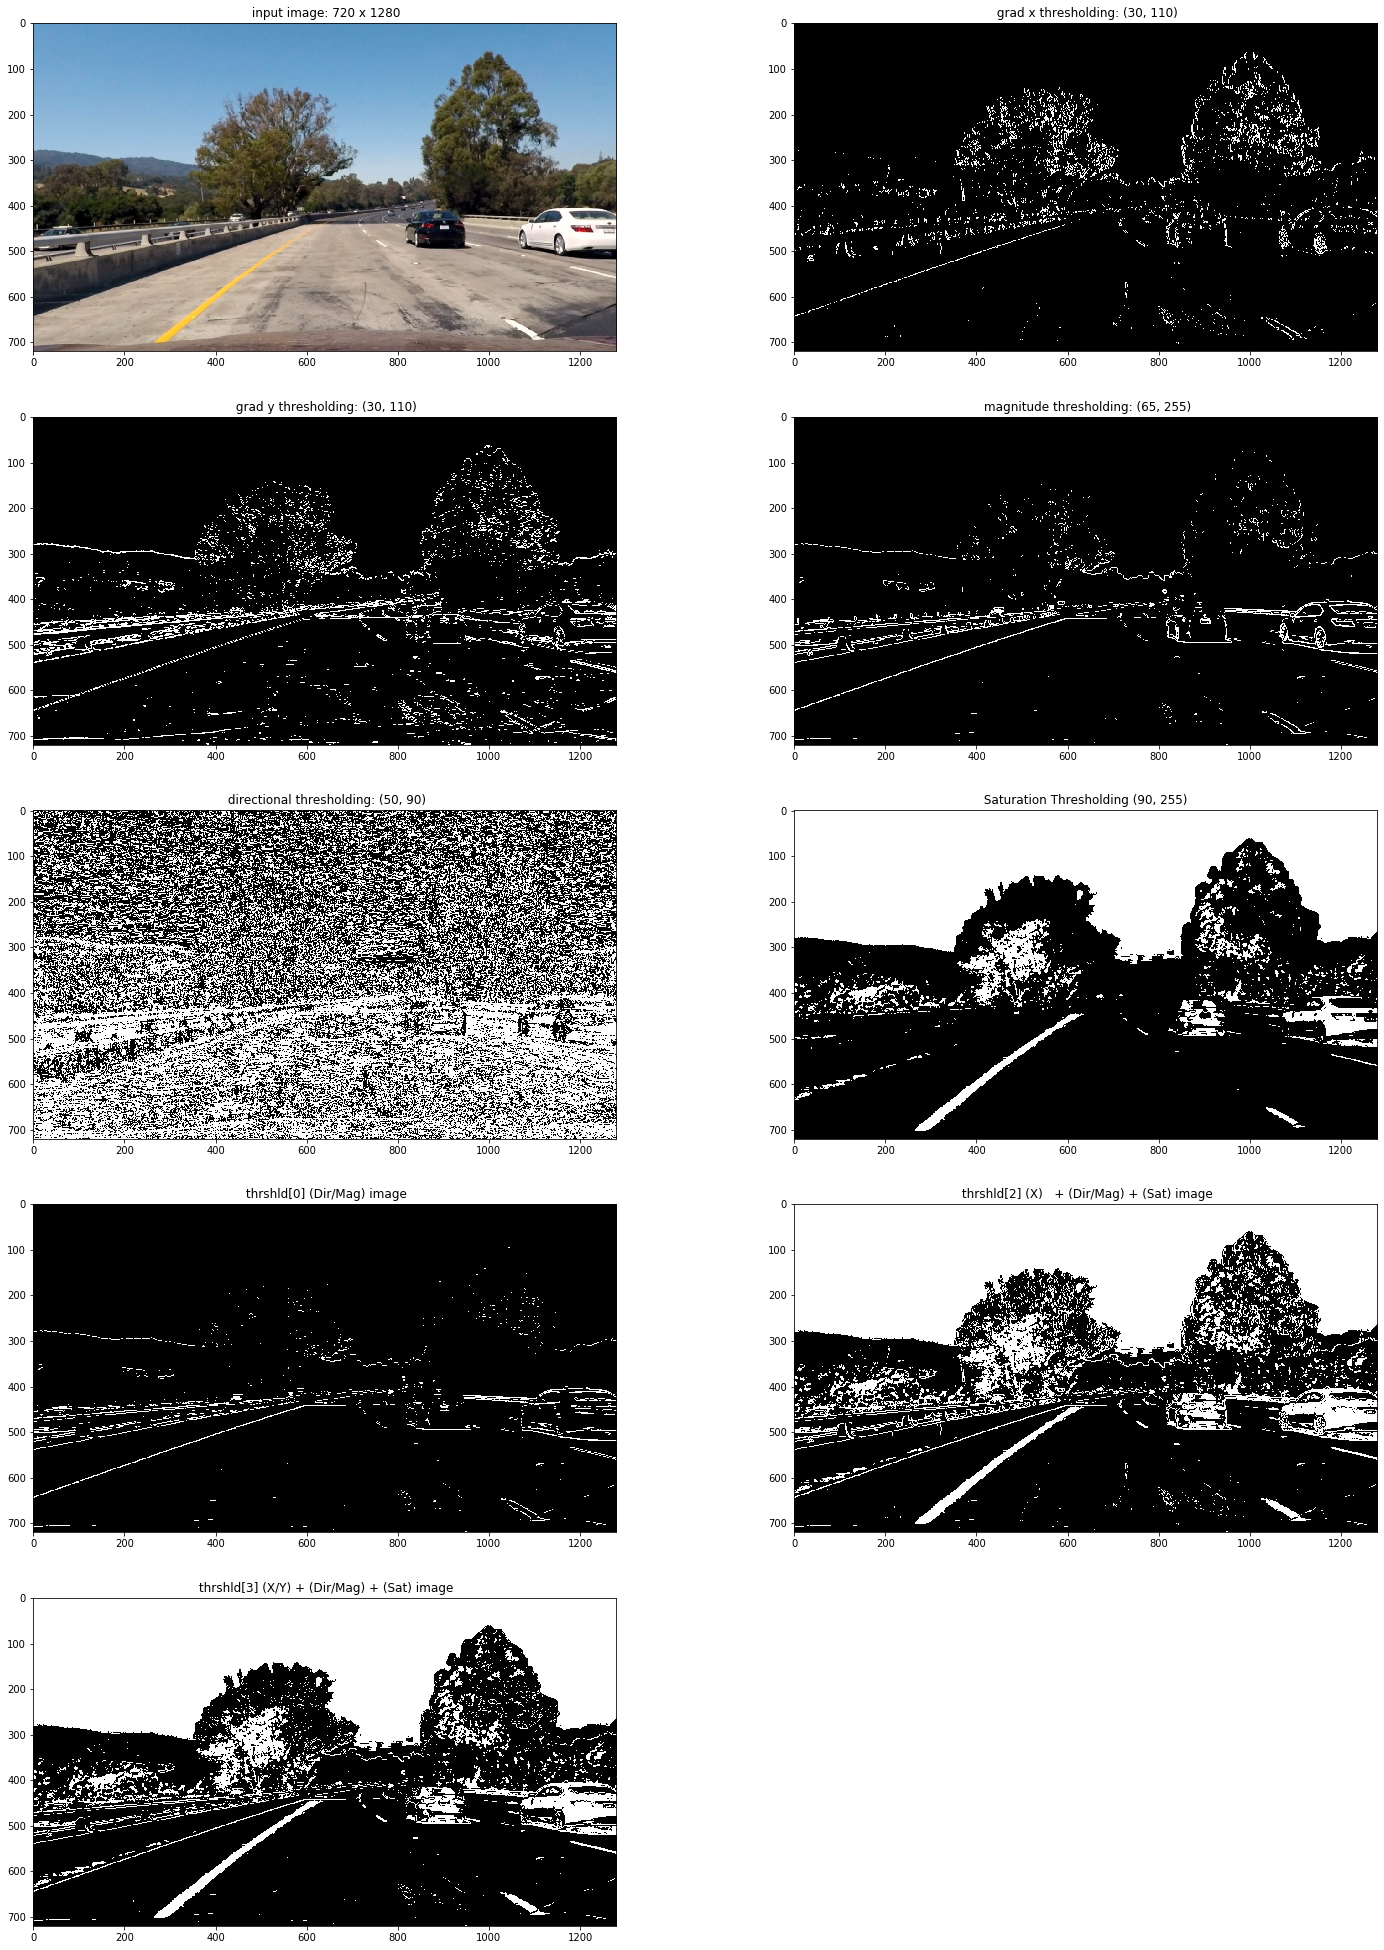

In [65]:
ksize = 19 # Choose a larger odd number to smooth gradient measurements
# grad_x_thr = (70,100)
# grad_y_thr = (80,155)
# mag_thr    = (90,160)
ksize      = 3
grad_x_thr = (30,110)
grad_y_thr = (30,110)

mag_thr    = (65,255)

theta1     = 45
theta2     = 67
dir_thr    = (50,90)
sat_thr    = (90,255)

height, width, _   = image.shape
camera_x           = width //2
camera_y           = height
x_top_left  = camera_x - 65
x_top_right = camera_x + 65
x_bot_left  = camera_x - 470
x_bot_right = camera_x + 490


RoI_y_bot   = image.shape[0] - 20
RoI_y_top   = RoI_y_bot - 260

x_transform_left  = 290
x_transform_right = 990

print(' Y bottom: ', RoI_y_bot, '   y_top : ', RoI_y_top)
RoI_vertices_list = [(x_bot_left , RoI_y_bot), 
                     (x_top_left , RoI_y_top), 
                     (x_top_right, RoI_y_top), 
                     (x_bot_right, RoI_y_bot)]
RoI_vertices      = np.array([RoI_vertices_list],dtype = np.int32)

warpedRoIVertices_list = [(x_transform_left-2 , 0), 
                          (x_transform_right+2, 0), 
                          (x_transform_right+2, height-1), 
                          (x_transform_left-2 , height-1)]
warpedRoIVertices = np.array([warpedRoIVertices_list],dtype = np.int32)


# src_points = np.array([ ( 611, RoI_y_top), 
#                         ( 666, RoI_y_top), 
#                         (1055, RoI_y_bot), 
#                          (250, RoI_y_bot)],dtype = np.float32)
# src_points = np.array([ ( 568, RoI_y_top), 
#                         ( 723, RoI_y_top), 
#                         (1090, RoI_y_bot), 
#                         ( 215, RoI_y_bot)],dtype = np.float32)
# dst_points = np.array([ (x_transform_left,    2), 
#                         (x_transform_right,   2), 
#                         (x_transform_right, 718), 
#                         (x_transform_left,  718)],dtype = np.float32)
# src_points = np.array([ ( 595, RoI_y_top),
#                         ( 690, RoI_y_top),
#                         (1087, RoI_y_bot),         ### was 692
#                         ( 228, RoI_y_bot)],dtype = np.float32)   ### was 705

src_points = np.array([ ( 608, RoI_y_top),
                        ( 675, RoI_y_top),
                        (1087, RoI_y_bot),      
                        ( 228, RoI_y_bot)],dtype = np.float32)   
dst_points = np.array([ (x_transform_left,    0), 
                        (x_transform_right,   0), 
                        (x_transform_right, height-1), 
                        (x_transform_left,  height-1)],dtype = np.float32)

# print(src_points.shape, src_points)
# print(dst_points.shape, dst_points)


image = mpimg.imread(sampleImages[image_id])

imgUndist = camera.undistortImage(image)

imgThrshld = apply_thresholds(imgUndist, ksize=ksize, x_thr = grad_x_thr, y_thr = grad_y_thr, 
                               mag_thr = mag_thr, dir_thr = dir_thr, sat_thr = sat_thr, debug = True)

In [66]:
print('imgThrshld:',type(imgThrshld), len(imgThrshld))
for i in range(len(imgThrshld)):
    print(i, 'shape:', imgThrshld[i].shape, imgThrshld[i].min(), imgThrshld[i].max())

imgWarped, M = perspectiveTransform(imgThrshld[-1], src_points, dst_points, debug = False)
Minv = cv2.getPerspectiveTransform(dst_points, src_points)
print('img Warped shape:', imgWarped.shape, imgWarped.min(), imgWarped.max())


img_roi   = draw_roi(imgUndist, RoI_vertices_list)
print('img_roi shape:', img_roi.shape, img_roi.min(), img_roi.max())

# imgMasked = region_of_interest(imgThrshld[-1], RoI_vertices)
# print('img Masked shape:', imgMasked.shape, imgMasked.min(), imgMasked.max())

imgMaskedDebug = region_of_interest(img_roi, RoI_vertices)
print('imgMaskedDebug shape:', imgMaskedDebug.shape, imgMaskedDebug.min(), imgMaskedDebug.max())

# pp                = region_of_interest(undistImg, RoI_vertices)
imgWarpedDebug, _ = perspectiveTransform(imgUndist, src_points, dst_points, debug = False)
imgWarpedThrshld  = apply_thresholds(imgWarpedDebug, ksize=ksize, 
                                     x_thr = grad_x_thr, y_thr = grad_y_thr, 
                                   mag_thr = (50,255), dir_thr = (0,10), 
                                   sat_thr = (80, 255), debug = False)
imgWarpedDebug_wRoILines    = draw_roi(imgWarpedDebug, warpedRoIVertices_list)

################################################################################################
### Select image we want to process further 
################################################################################################
working_image = imgWarped
# working_image = imgWarpedThrshld[-1]


leftx, lefty, rightx, righty, out_img, histogram = find_lane_pixels(working_image, debug = False)

imgLanePixels = display_lane_pixels(out_img, leftx, lefty, rightx, righty)

left_fit, right_fit = fit_polynomial(leftx, lefty, rightx, righty);

ploty, left_fitx, right_fitx = plot_polynomial(imgLanePixels.shape[0], left_fit, right_fit)

# print('  input_img : ', working_image.min(), working_image.max())
# print('  output_img: ', imgLanePixels.min(), imgLanePixels.max())

result_1 = projectOnImage(imgUndist, ploty, left_fitx, right_fitx, Minv)
# display_one(result_1)

curv_msg, _ , _ , _  = measure_curvature(700, left_fit, right_fit, 'm', debug = True)
# print(curv_msg)

result_2 = draw_text(result_1, 40,40, curv_msg, fontHeight = 25)
# display_one(result_2)

plot_index = -20
oc_msg = calc_off_center(ploty[plot_index], left_fitx[plot_index], right_fitx[plot_index], camera_x, debug = True)
print(oc_msg)

result_3 = draw_text(result_2, 40,80, oc_msg, fontHeight = 25)
draw_guidelines(result_3, draw = 'y');

imgThrshld: <class 'list'> 4
0 shape: (720, 1280) 0.0 1.0
1 shape: (720, 1280) 0.0 1.0
2 shape: (720, 1280) 0.0 1.0
3 shape: (720, 1280) 0.0 1.0
img Warped shape: (720, 1280) 0.0 1.0
 input :  (720, 1280, 3)
 output :  (720, 1280, 3)
img_roi shape: (720, 1280, 3) 0 255
imgMaskedDebug shape: (720, 1280, 3) 0 255
 input :  (720, 1280, 3)
 output :  (720, 1280, 3)
   y eval   avg pxl    left_pxl   right_pxl 
      700    2362.04    2111.51    2612.58 
Curvature  L: 2111 m  R: 2612 m
Y:  700  Left lane:  304.955  right_lane:  977.522  midpt:  640.955  off_center:    0.955 , off_center(mtrs):    0.005 
0.005 m left of lane center


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


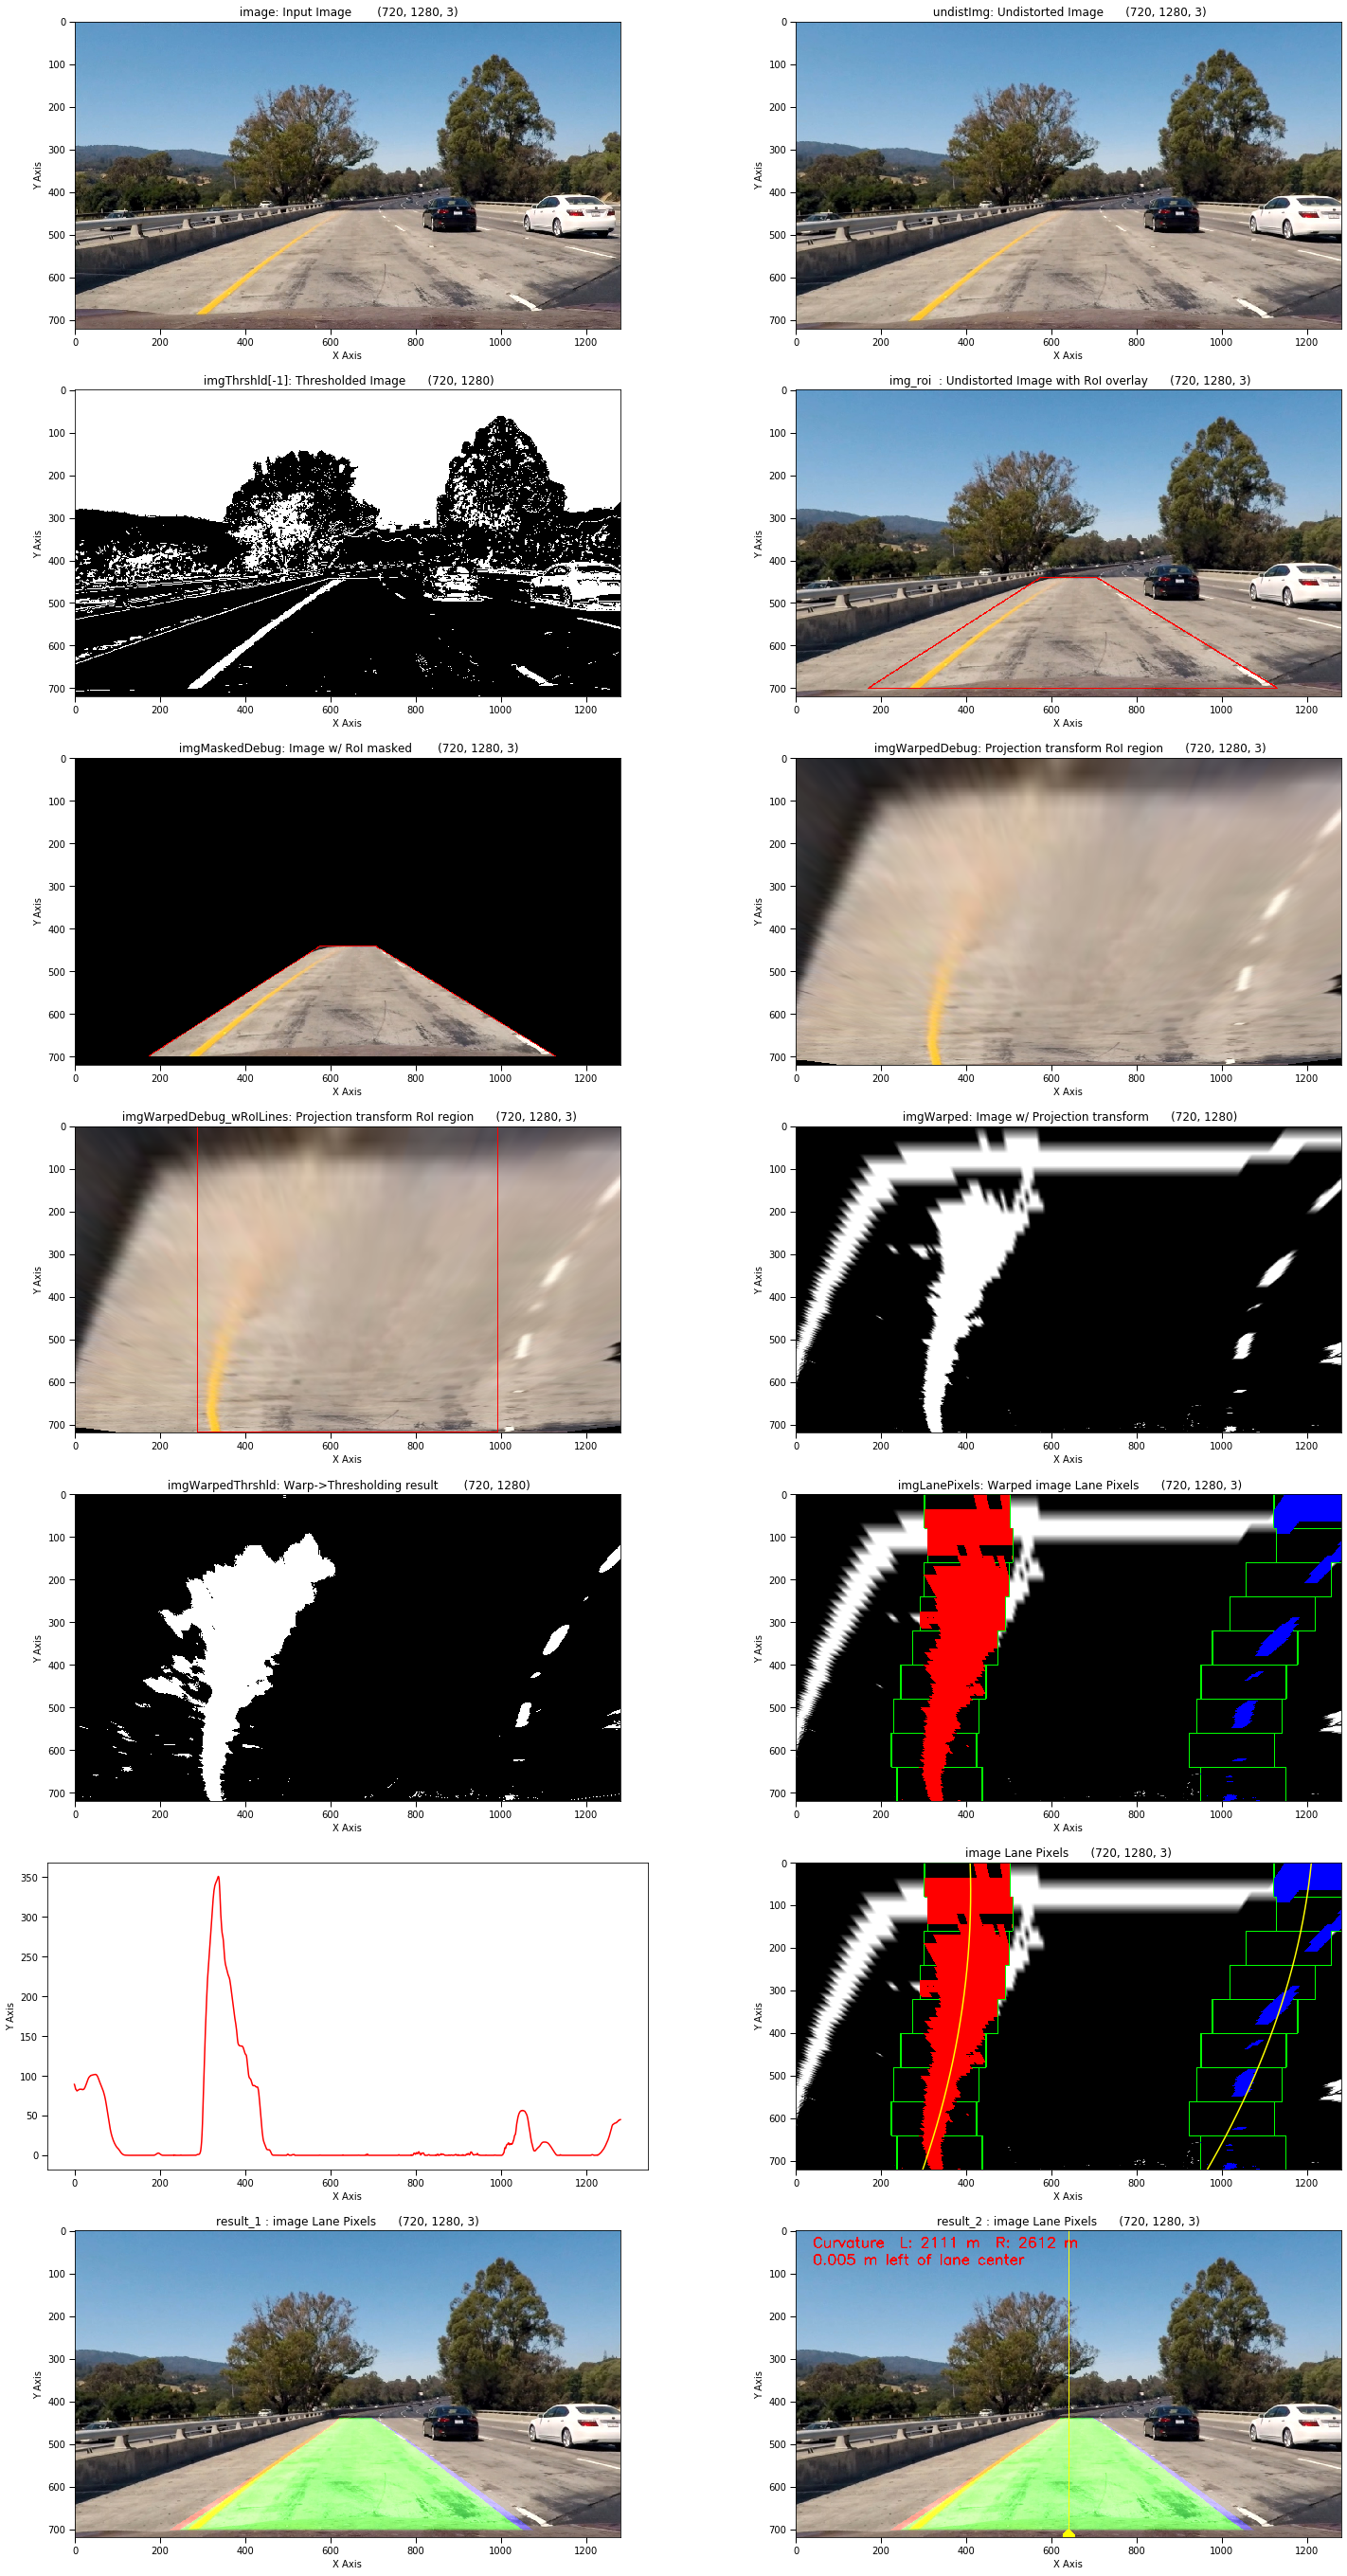

<Figure size 1800x4032 with 0 Axes>

In [67]:
disp  = PlotDisplay(8,2)

disp.addPlot(image              , title = ' image: Input Image ' )
disp.addPlot(imgUndist          , title = ' undistImg: Undistorted Image')
disp.addPlot(imgThrshld[-1]     , title = ' imgThrshld[-1]: Thresholded Image')
disp.addPlot(img_roi            , title = ' img_roi  : Undistorted Image with RoI overlay')
disp.addPlot(imgMaskedDebug     , title = ' imgMaskedDebug: Image w/ RoI masked ')
disp.addPlot(imgWarpedDebug     , title = ' imgWarpedDebug: Projection transform RoI region')
disp.addPlot(imgWarpedDebug_wRoILines, title = ' imgWarpedDebug_wRoILines: Projection transform RoI region')
# disp.addPlot(imgMasked     , title = ' imgMasked: Thresholded Image w/ RoI masked')
disp.addPlot(imgWarped           , title = ' imgWarped: Threshld->Proj transform')
disp.addPlot(imgWarpedThrshld[-1], title = ' imgWarpedThrshld: Proj transform->Thresholding')

disp.addPlot(imgLanePixels       , title = ' imgLanePixels: Warped image Lane Pixels')
disp.addPlot(histogram, title= 'Histogram', type = 'plot' )

# disp2.addPlot(working_image)  ## same as imgWarped
disp.addPlot(imgLanePixels, title='image Lane Pixels')
disp.addPlot(left_fitx    , ploty,  subplot = disp.subplot, type = 'plot', color = 'yellow')
disp.addPlot(right_fitx   , ploty,  subplot = disp.subplot, type = 'plot', color = 'yellow')
disp.addPlot(result_1, title='result_1 : image Lane Pixels')
disp.addPlot(result_3, title='result_2 : image Lane Pixels')

disp.closePlot()

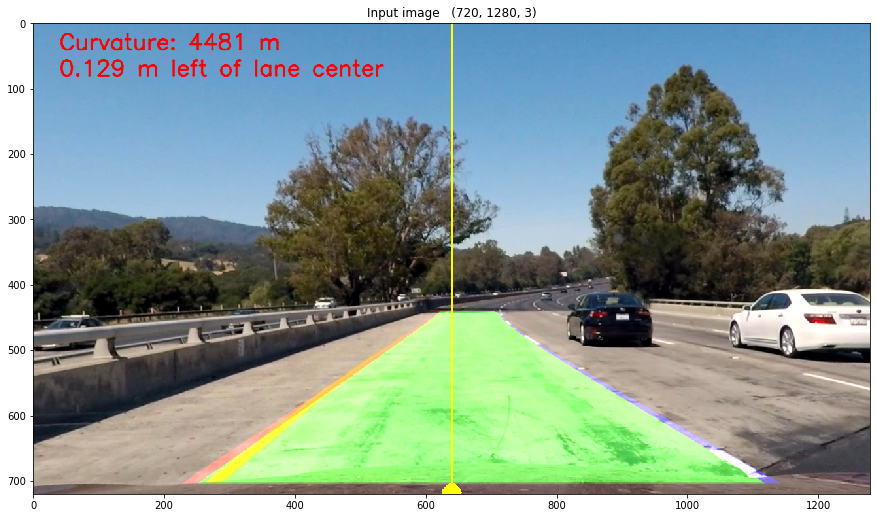

In [51]:
display_one(result_3)

In [47]:
filename_ext = os.path.basename(sampleImages[image_id])
filename = os.path.splitext(filename_ext)
rc = mpimg.imsave('./output_images/'+filename[0]+'_output'+filename[1], result_3)
print(rc)

straight_lines1.jpg
('straight_lines1', '.jpg')
None


#### Curvature calculations 

In [140]:
print("  {:8s}  {:8s}   {:8s}   {:8s}      {:8s}   {:8s}  {:8s} ".format(" y eval" ,"avg pxl", "left_pxl" , "right_pxl", "avg mtr","left_mtr", "right_mtr"))
print('-'*80)
for y_eval in range(20,730,50):
    curv_avg_pxl, curv_left_pxl, curv_right_pxl = measure_curvature(y_eval, left_fit, right_fit, 'p')
    curv_avg_mtr, curv_left_mtr, curv_right_mtr = measure_curvature(y_eval, left_fit, right_fit, 'm')
    print(" {:8.0f}   {:8.2f}   {:8.2f}   {:8.2f}      {:8.2f}   {:8.2f}   {:8.2f} ".format(y_eval, 
                                                                                            curv_avg_pxl, curv_left_pxl, curv_right_pxl, 
                                                                                            curv_avg_mtr, curv_left_mtr, curv_right_mtr))

   y eval   avg pxl    left_pxl   right_pxl      avg mtr    left_mtr  right_mtr 
--------------------------------------------------------------------------------
       20   25210.90   25994.85   24426.95       8279.98    8536.78    8023.18 
       70   25210.24   25993.47   24427.02       8280.68    8537.37    8023.99 
      120   25209.88   25992.37   24427.38       8282.28    8538.83    8025.74 
      170   25209.81   25991.57   24428.06       8284.80    8541.17    8028.42 
      220   25210.05   25991.05   24429.04       8288.21    8544.38    8032.04 
      270   25210.58   25990.82   24430.33       8292.54    8548.48    8036.60 
      320   25211.41   25990.88   24431.93       8297.78    8553.46    8042.09 
      370   25212.53   25991.23   24433.83       8303.92    8559.32    8048.52 
      420   25213.96   25991.87   24436.05       8310.97    8566.06    8055.89 
      470   25215.68   25992.79   24438.56       8318.93    8573.68    8064.19 
      520   25217.70   25994.01   2444

# Apply Gradient Thresholding Functions

In [ ]:
## Combine multiple functions
image = mpimg.imread(sampleNames[0])

## Gradient Magnitude Thresholding

In [ ]:
# mag_thr = (90,160)
mag_thr = (65,255)
mag_binary = grad_mag_thresh(image, sobel_kernel=ksize, thresh=mag_thr, display = True)

In [ ]:
# mag_thr = (90,160)

mag_thr = (80,255)
for low_thr in [60,70,80,90,100,110]:
    mag_thr = (low_thr, 255)
    mag_binary = grad_mag_thresh(image, sobel_kernel=ksize, thresh=mag_thr, display = False)
    display_one(mag_binary, title = 'mag Thresholding '+str(mag_thr), size = 10)

## Saturation Thresholding 

In [ ]:
sat_thr = (110, 255)
s_binary   = saturation_thresh(image, thresh=sat_thr, display = True)
display_one(s_binary, title = 'Saturation Thresholding '+str(sat_thr), size = 10)    

In [ ]:
for low_thr in [70, 90,110,130,150,170,190,210, 230]:
    sat_thr = (low_thr, 255)
    s_binary   = saturation_thresh(image, thresh=sat_thr)
    display_one(s_binary, title = 'Saturation Thresholding '+str(sat_thr), size = 10)    

## Applying Multiple Thresholds 

In [ ]:
# Choose a Sobel kernel size
ksize = 19 # Choose a larger odd number to smooth gradient measurements
# grad_x_thr = (70,100)
# grad_y_thr = (80,155)
# mag_thr    = (90,160)
ksize      = 19
grad_x_thr = (30,110)
grad_y_thr = (30,110)

mag_thr    = (65,255)

theta1     = 45
theta2     = 67
dir_thr    = (deg2rad(theta1), deg2rad(theta2))
sat_thr    = (90,255)

apply_thresholds(image, ksize=ksize, x_thr = grad_x_thr, y_thr = grad_y_thr, 
                        mag_thr = mag_thr, dir_thr = dir_thr, sat_thr = sat_thr, debug = True);

In [ ]:
## STEP 4: Define region of interest and call masking fuction
height, width, _   = image.shape
camera_x           = width //2
camera_y           = height
x_offset_top_left  = 80
x_offset_top_right = 90
y_offset_top       = 350

x_offset_bot_left  = 380
x_offset_bot_right = 440
y_offset_bottom    = image.shape[0]

RoI_vertices_list = [(camera_x - x_offset_bot_left , y_offset_bottom-1), 
                     (camera_x - x_offset_top_left , y_offset_top), 
                     (camera_x + x_offset_top_right, y_offset_top), 
                     (camera_x + x_offset_bot_right, y_offset_bottom-1) ]
RoI_vertices      = np.array([RoI_vertices_list],dtype = np.int32)

imgMasked = region_of_interest(imgCanny, RoI_vertices)


#  Misc Code

### Apply distortion correction to sample images

In [ ]:
for name in sampleNames:
    imgObj = CalibrationImage(name)
    origImg = imgObj.getImage()
    undistImg = camera.undistortImage(origImg)
    display_two(origImg, undistImg, title1 = imgObj.filename , title2 = ' Undistorted Image') 

### project lane detected region on image 

(720, 1280)
(720, 1280, 3)
(720, 1280)
pts_left:  (720,) (720,) (2, 720) (720, 2)
pts_right:  (720,) (720,) (2, 720) (720, 2) (720, 2)
[[975.65285891   0.        ]
 [975.6879938    1.        ]
 [975.72311759   2.        ]
 ...
 [997.99476658 717.        ]
 [998.02194111 718.        ]
 [998.04910454 719.        ]]
[[998.04910454 719.        ]
 [998.02194111 718.        ]
 [997.99476658 717.        ]
 ...
 [975.72311759   2.        ]
 [975.6879938    1.        ]
 [975.65285891   0.        ]]
pts:  (1, 1440, 2) [[[279.24594642   0.        ]
  [279.28232796   1.        ]
  [279.31860638   2.        ]
  ...
  [975.72311759   2.        ]
  [975.6879938    1.        ]
  [975.65285891   0.        ]]]


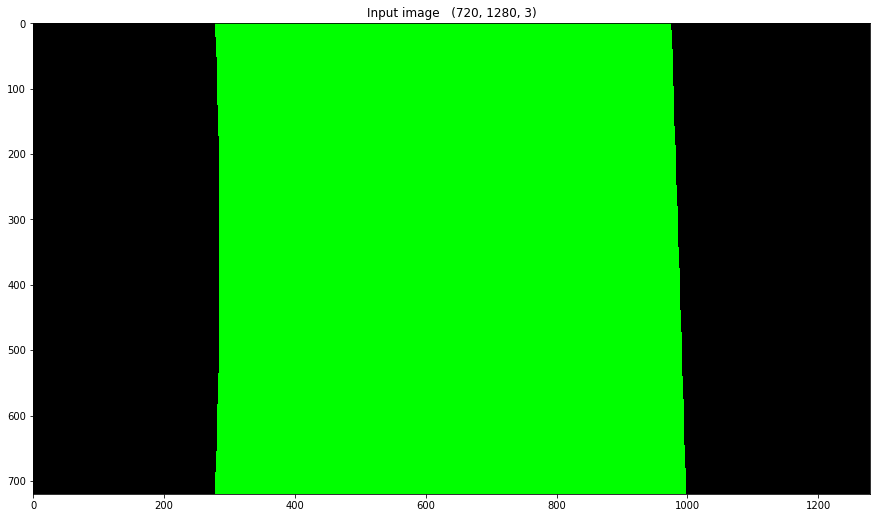

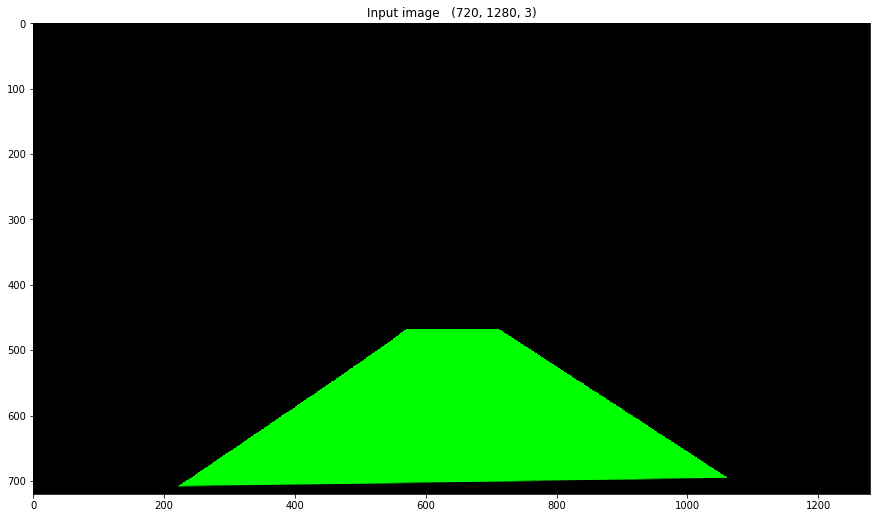

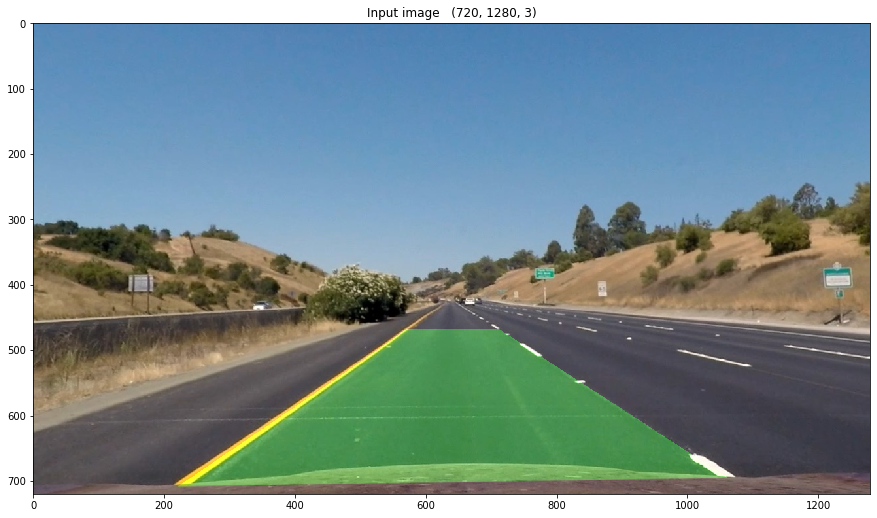

In [105]:
print(imgWarped.shape)
print(image.shape)
print(imgUndist.shape[:-1])
warp_zero = np.zeros_like(imgWarped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))
print('pts_left: ', left_fitx.shape, ploty.shape, np.vstack([left_fitx, ploty]).shape,np.transpose(np.vstack([left_fitx, ploty])).shape )
print('pts_right: ', right_fitx.shape, ploty.shape, np.vstack([right_fitx, ploty]).shape, np.transpose(np.vstack([left_fitx, ploty])).shape, 
     np.flipud(np.transpose(np.vstack([right_fitx, ploty]))).shape)
print(np.transpose(np.vstack([right_fitx, ploty])))
print(np.flipud(np.transpose(np.vstack([right_fitx, ploty]))))

print('pts: ', pts.shape, pts)


cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
display_one(color_warp)

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
display_one(newwarp)

# Combine the result with the original image
result = cv2.addWeighted(imgUndist, 1, newwarp, 0.3, 0)
display_one(result)

### Run `findChessboardCorners()` 

In [ ]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

In [ ]:
# Step through the list and search for chessboard corners
for fname in images:
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    rows = 1
    cols = 2
    fig = plt.figure(figsize=(20, 7 * rows))
    fig.tight_layout()
        
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    corners = np.squeeze(corners)
    
    # If found, add object points, image points
    if ret == True:
        print(fname, ' ret: ', ret, ' objp:', objp.shape, ' corners: ', corners.shape)
        print(corners[:10,:])
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(2500)
#         ax1 = plt.subplot(rows,cols,1)
#         ax2 = plt.subplot(rows,cols,2)
#         ax1.imshow(inputImg)
#         ax1.set_title(' input image ' +str(inputImg.shape), fontsize=10)
#         ax2.imshow(undistImg)
#         ax2.set_title(' undistorted image '+str(undistImg.shape), fontsize=10)
#         subplot += 2
    else:
        print(fname, ' ret: ', ret, corners.shape, type(corners), corners.size)
#         cv2.imshow('img',img)
#         cv2.waitKey(2500)

cv2.destroyAllWindows()
